<a href="https://colab.research.google.com/github/TianziLuo/Machine-learning-/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Random Forest**

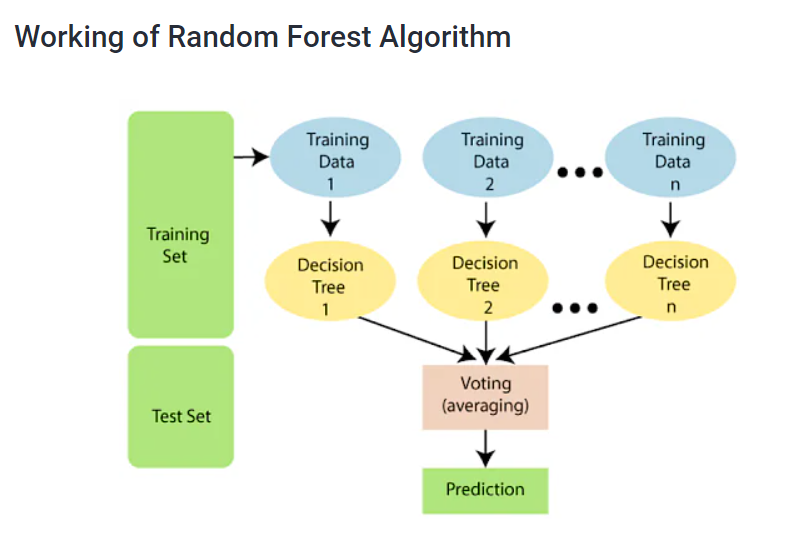
### i) supervised machine learning algorithm
  

  training set: labeled input


  test set: unlabeled data
### ii)steps:
  

Step 1: Select random samples from a given data or training set.

Step 2: This algorithm will construct a decision tree for every training data.

Step 3: Voting will take place by averaging the decision tree.

Step 4: Finally, select the most voted prediction result as the final prediction result.

### **Import Libraries**:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### **Loading Dataset**:

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd 
data=pd.read_csv('/content/gdrive/MyDrive/machine learning/dataset/survey lung cancer.csv')

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2150c5f5b0>,
      dtype=object)

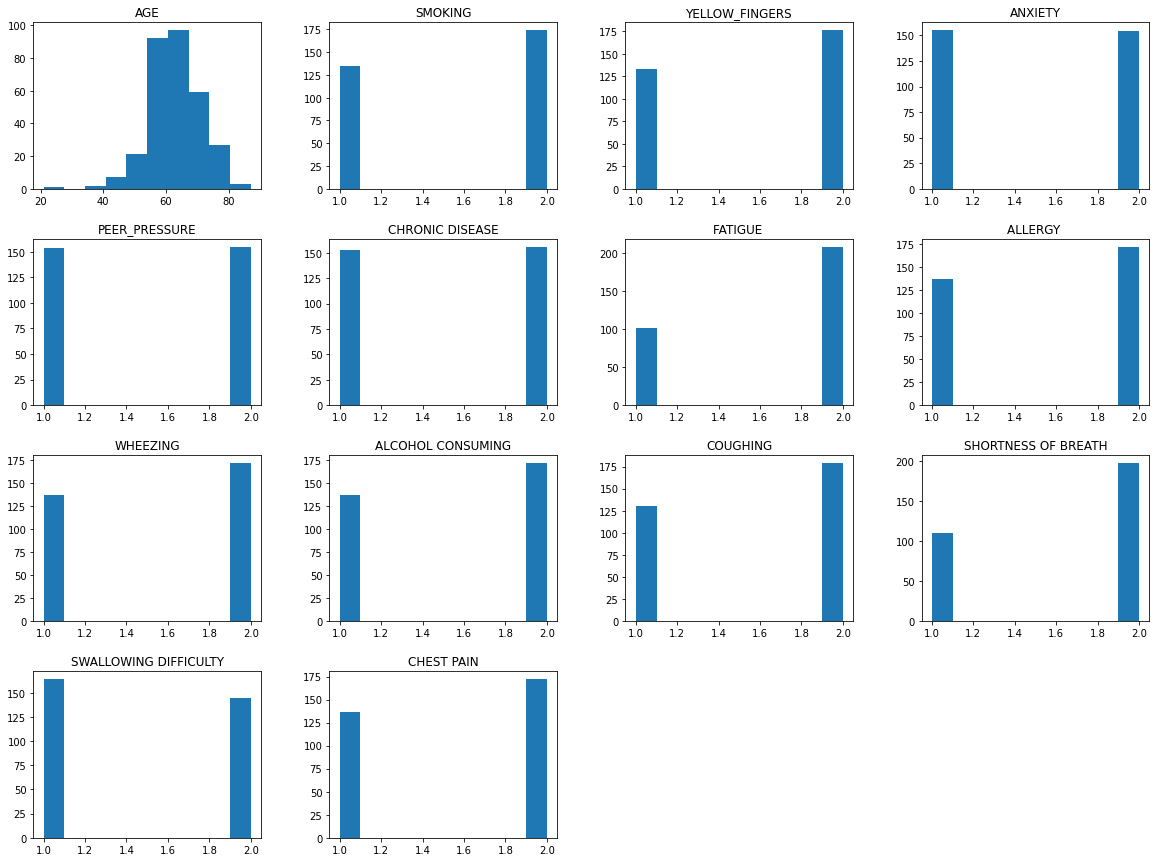

In [ ]:
data.hist(figsize=(20,15),grid=False)

In [ ]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
data.duplicated().sum()

33

In [ ]:
data.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [ ]:
data['LUNG_CANCER'].replace(to_replace=['NO', 'YES'], value=[0, 1],inplace=True)

In [ ]:
data['GENDER'].replace(to_replace=['F','M'],value=[1,0],inplace=True)

In [ ]:
X = data.iloc[:,: -1]
#print(X)

In [ ]:
# label
y = data.iloc[:,15]
# print(y)

### **Split training and teseing set**:

In [ ]:
#import train_test_split from sklearn
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

### Decision tree:

Parameters: Gini and Entropy:

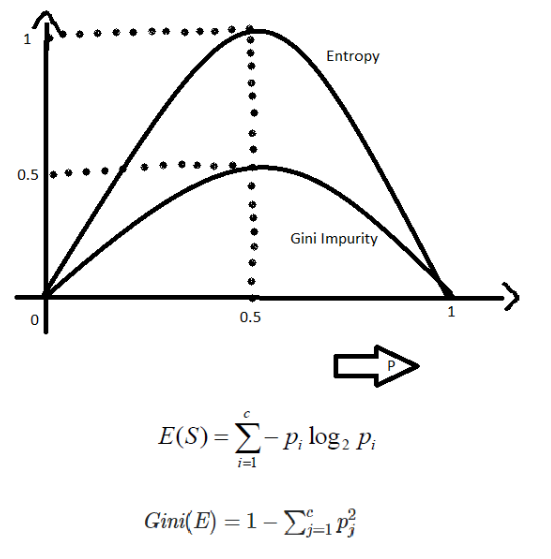



In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# Create random forest classifer object
clf = RandomForestClassifier(n_estimators=100,
                             criterion='gini',max_depth=8,
                             bootstrap=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test,y_pred)
print('the accuracy is: %s' %acc)
cfm = confusion_matrix(y_test,y_pred)
print('the confusion matrix is: \n%s' %cfm)

the accuracy is: 0.8709677419354839
the confusion matrix is: 
[[ 5 10]
 [ 2 76]]


Text(0.5, 1.0, 'accuracy with tree depth increasing')

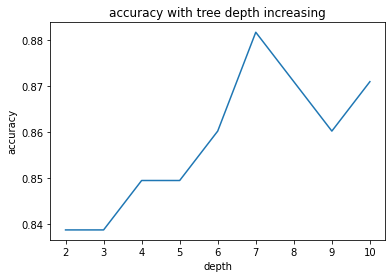

In [ ]:
I = []
ACC = []
for i in range (2,11):
  clf = RandomForestClassifier(n_estimators=100,
                             criterion='gini',max_depth=i,
                             bootstrap=True)
  clf.fit(X_train,y_train)  
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  ACC.append(acc)
  I.append(i)

plt.plot(I,ACC)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('accuracy with tree depth increasing')

## N=7